In [1]:
# Import the necessary libraries

# %pip install pandas
# %pip install sqlalchemy
# %pip install dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from dotenv import load_dotenv

import os

In [2]:
# Establish a connection to the database

load_dotenv()
db_url = os.getenv("DB_URL")
engine = create_engine(db_url)

In [3]:
# Use SQL queries to retrieve user-related data
# Query to retrieve user data
user_query = "SELECT * FROM users"

# Query to count the number of tracks added by each user
tracks_per_user_query = """
SELECT U.user_name, COUNT(UT.track_id) AS tracks_added
FROM UserTracks UT
INNER JOIN Users U ON UT.user_id = U.user_id
GROUP BY UT.user_id, U.user_name
"""

In [4]:
# Create Pandas DataFrames from the retrieved data

users_df = pd.read_sql(user_query, engine)
tracks_per_user_df = pd.read_sql(tracks_per_user_query, engine)

In [5]:
tracks_per_user_df.head()

,user_name,tracks_added
0,Bnooru,17
1,drima,5
2,Victor Jimenez,141
3,André Moura,206
4,Mateus Siqueira,9


In [6]:
# Perfom user-related analysis
# Count the number of users
num_users = users_df.shape[0]

In [7]:
# Find users who have added the most tracks
top_users = tracks_per_user_df.nlargest(5, 'tracks_added')

In [8]:
# Calculate the average number of tracks added per user
average_tracks_per_user = tracks_per_user_df['tracks_added'].mean()

In [9]:
# Display the results
print(f"Number of users: {num_users}")
print("Top users by tracks added:")
print(top_users)
print(f"Average tracks added per user: {average_tracks_per_user:.2f}")

Number of users: 19
Top users by tracks added:
                 user_name  tracks_added
18                   Vitor           416
17  Pedro Henrique Fonseca           386
3              André Moura           206
12           Fabio Zotesso           206
2           Victor Jimenez           141
Average tracks added per user: 93.58


c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


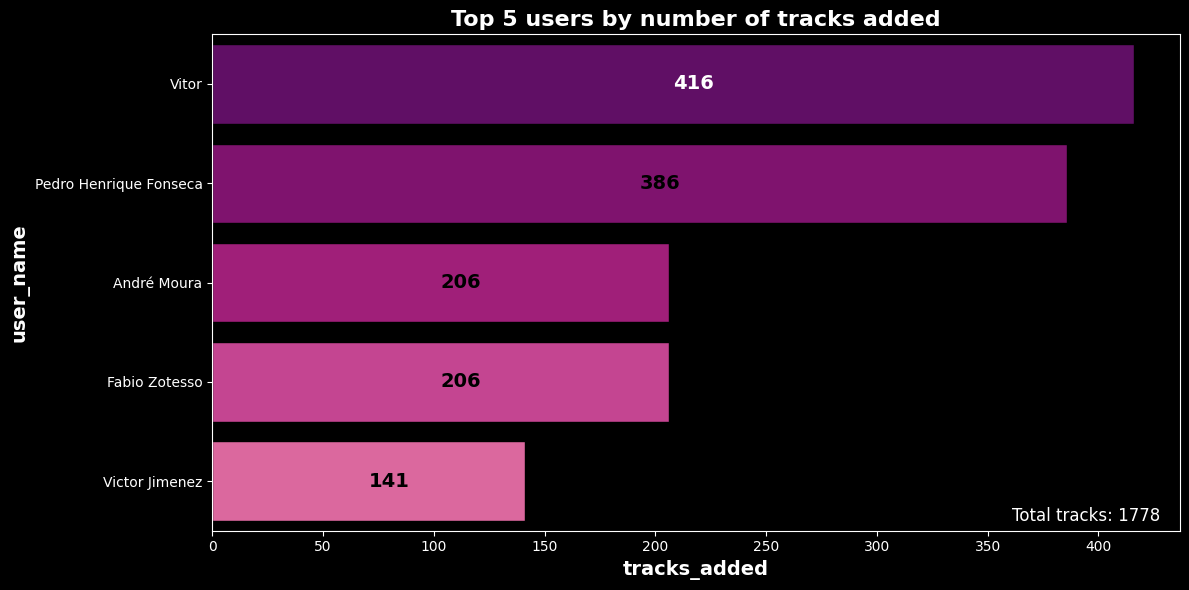

In [10]:
# plot most active users by number of tracks added
# color palette
plt.style.use("dark_background")
palette = sns.color_palette("RdPu", 10)[::-1]
sns.set_palette(palette)
sns.color_palette("rocket")

# create a figure with size 12x6
plt.figure(figsize=(12, 6))

# set labels and titles
plt.title("Top 5 users by number of tracks added", fontsize=16, fontweight="bold")
plt.xlabel("Número de músicas", fontsize=14, fontweight="bold")
plt.ylabel("Artista", fontsize=14, fontweight="bold")

# Create a horizontal bar plot 
barplot = sns.barplot(
        x=top_users["tracks_added"],
        y=top_users["user_name"],
        palette=palette,
        edgecolor="black",
        orient="h",
)

# Add the total number of tracks inside the bars
for i, p in enumerate(barplot.patches):
        width = p.get_width()
        # Get the RGB color of the bar and convert it to HSV
        rgb_color = mcolors.colorConverter.to_rgb(palette[i])
        hsv_color = mcolors.rgb_to_hsv(rgb_color)
        # If the value/brightness component of the HSV color is less than 0.5, set the text color to white, else set it to black
        text_color = 'white' if hsv_color[2] < 0.5 else 'black'
        # Add the text inside the bar
        plt.text(x = width/2,
                y = p.get_y()+(p.get_height()/2), 
                s = '{:.0f}'.format(width),
                va = 'center',
                color = text_color,  # Set the text color
                fontsize = 14,
                fontweight = 'bold')
        

# Add total of tracks as side information on the graph

total_tracks = tracks_per_user_df['tracks_added'].sum()
plt.text(
        x = 0.98, 
        y = 0.02, 
        s = f'Total tracks: {total_tracks}', 
        transform=plt.gca().transAxes, 
        fontsize=12, 
        horizontalalignment='right'
        )


# adjust the layout of the plot
plt.tight_layout()

# save the plot as a png file
plt.savefig("../images/top_users.png", dpi=300)

plt.show()

In [11]:
# Close the database connection
engine.dispose()